# Chapter 8: Non-linear Optimization

## 8.1 Introduction: Why Non-linear Optimization in Engineering?

In typical real-world engineering systems rarely conform to the simplifying assumptions of linearity or convexity. Non-linear optimization, often formalized as Non-linear Programming (NLP) problems, addresses these complexities by enabling the minimization (or maximization) of objective functions subject to non-linear constraints. For instance, in spacecraft trajectory design, engineers must optimize fuel consumption (a non-linear objective influenced by gravitational fields, atmospheric drag, and thrust vectors) while adhering to constraints like orbital mechanics equations and safety margins. These problems are ubiquitous in aerospace applications, from attitude control of satellites to mission planning for interplanetary probes, where small deviations in parameters can lead to exponentially different outcomes.

This chapter builds directly on the foundations laid in Chapter 7, where we explored convex and linear optimization techniques. There, we focused on problems with guaranteed global optima, such as linear programming (LP) for resource allocation or quadratic programming (QP) for least-squares fitting. However, many engineering scenarios introduce non-linearities (e.g., quadratic drag forces in re-entry vehicles or trigonometric relationships in robotic arm kinematics) that render those methods insufficient. Here, we generalize to NLPs, emphasizing local minima and practical solvers that handle these challenges computationally.

Looking ahead, the concepts introduced in this chapter pave the way for global and derivative-free optimization in Chapter 9, which tackles the pitfalls of local solutions in highly multimodal landscapes. Furthermore, non-linear optimization forms the backbone of advanced control strategies covered in Chapters 10–14, such as model-predictive control (MPC) for autonomous spacecraft maneuvers or reinforcement learning (RL) for adaptive station-keeping in orbits. By mastering NLPs, you'll gain tools to simulate, optimize, and control complex systems, bridging theoretical models with deployable engineering solutions.


## 8.2 Non-linear Programming Problems (NLPs)

Non-linear programming (NLP) encompasses a broad class of optimization problems where the objective function, constraints, or both exhibit non-linear behavior. Unlike linear or convex problems, NLPs can arise in diverse engineering applications, such as structural design, process control, or system identification, where relationships between variables are inherently non-linear (e.g. quadratic energy losses in mechanical systems or exponential decay in chemical reactions). These problems require computational methods to find feasible solutions, often focusing on local optima due to the potential for multiple minima in the landscape.
Formally, an NLP can be stated as:

$$\min_{\mathbf{x} \in \mathcal{X}} \, f(\mathbf{x})$$

subject to:

$$\mathbf{g}(\mathbf{x}) \leq \mathbf{0}, \quad \mathbf{h}(\mathbf{x}) = \mathbf{0},$$

where:

- $f: \mathbb{R}^n \to \mathbb{R}$ is the scalar-valued objective function (typically non-linear),
- $\mathbf{x} \in \mathbb{R}^n$ is the vector of decision variables,
- $\mathcal{X} \subseteq \mathbb{R}^n$ defines the domain (e.g., bounds on $\mathbf{x}$),
- $\mathbf{g}: \mathbb{R}^n \to \mathbb{R}^m$ represents the vector of inequality constraints (possibly non-linear),
- $\mathbf{h}: \mathbb{R}^n \to \mathbb{R}^p$ represents the vector of equality constraints (possibly non-linear).

This formulation allows for great flexibility but introduces challenges like non-convexity, which can lead to saddle points or local minima that are not globally optimal.
In contrast to Chapter 7, where we dealt with convex and linear optimization problems (e.g., LP and QP) that guarantee unique global solutions via methods like gradient descent or simplex algorithms, NLPs extend these ideas to handle constraints and non-linearities. Here, we shift focus from unconstrained or linearly constrained scenarios to general constrained problems, emphasizing iterative techniques that approximate solutions around local minima. For example, while Chapter 7 might optimize a linear cost in a manufacturing process, an NLP could minimize a non-linear efficiency metric subject to curved feasibility boundaries, such as in fluid flow optimization. The remainder of this chapter explores key conditions and algorithms to solve these, building toward practical implementations in Python.



### 8.3 KKT Conditions
[Introduction, formal definition (primal/dual feasibility, stationarity, complementarity), graphical demonstration with Matplotlib contours.]
[Python example: Symbolic KKT with SymPy on a quadratic program.]

#### 8.3.1 Formal defintion and analytical solutions to KKT conditions

The Karush-Kuhn-Tucker (KKT) conditions provide a set of necessary criteria for a point to be a local optimum in constrained non-linear programming problems. These conditions generalize the method of Lagrange multipliers to handle both equality and inequality constraints, making them essential for understanding and verifying solutions in NLPs. In computational engineering, KKT conditions are not only theoretical but also practical—they form the basis for many optimization algorithms (e.g., interior-point methods) and help diagnose why a solver converges to a particular point. While sufficient for convex problems (ensuring global optimality), in general NLPs, they identify candidate local minima, subject to qualifications like constraint qualifications (e.g., linear independence of active constraints).
Formally, for the NLP:
$$\min_{\mathbf{x}} \, f(\mathbf{x})$$
subject to:
$$\mathbf{g}(\mathbf{x}) \leq \mathbf{0}, \quad \mathbf{h}(\mathbf{x}) = \mathbf{0},$$
a point $  \mathbf{x}^*  $ is a KKT point if there exist Lagrange multipliers $  \boldsymbol{\lambda} \in \mathbb{R}^m  $ (for inequalities) and $  \boldsymbol{\mu} \in \mathbb{R}^p  $ (for equalities) satisfying:

Primal feasibility:
$$\mathbf{g}(\mathbf{x}^*) \leq \mathbf{0}, \quad \mathbf{h}(\mathbf{x}^*) = \mathbf{0}.$$
This ensures the candidate solution lies within the feasible region.
Dual feasibility:
$$\boldsymbol{\lambda} \geq \mathbf{0}.$$
This requires non-negative multipliers for inequality constraints, reflecting their "one-sided" nature.
Stationarity:
$$\nabla f(\mathbf{x}^*) + \sum_{i=1}^m \lambda_i \nabla g_i(\mathbf{x}^*) + \sum_{j=1}^p \mu_j \nabla h_j(\mathbf{x}^*) = \mathbf{0}.$$
This balances the gradient of the objective with weighted gradients of the constraints, analogous to unconstrained stationarity ($  \nabla f = \mathbf{0}  $).
Complementarity (or complementary slackness):
$$\lambda_i \, g_i(\mathbf{x}^*) = 0 \quad \forall i = 1, \dots, m.$$
This implies that for each inequality, either the constraint is active ($  g_i(\mathbf{x}^*) = 0  $) or its multiplier is zero ($  \lambda_i = 0  $), but not both—preventing "over-penalization" of inactive constraints.

These conditions are necessary under mild assumptions (e.g., Slater's condition for convexity) but may not be sufficient in non-convex cases, where spurious solutions like saddle points can satisfy them.
To visualize, consider a simple 2D NLP: minimize $  f(x, y) = (x-1)^2 + (y-1)^2  $ subject to $  g(x, y) = x + y - 1 \leq 0  $. The objective contours are circles centered at (1,1), and the constraint is a half-plane below the line $  x + y = 1  $. At the optimum (0.5, 0.5), the gradient of $  f  $ points away from the feasible region but is balanced by the constraint gradient scaled by $  \lambda > 0  $. We can demonstrate this graphically using Matplotlib to plot contours and vectors.



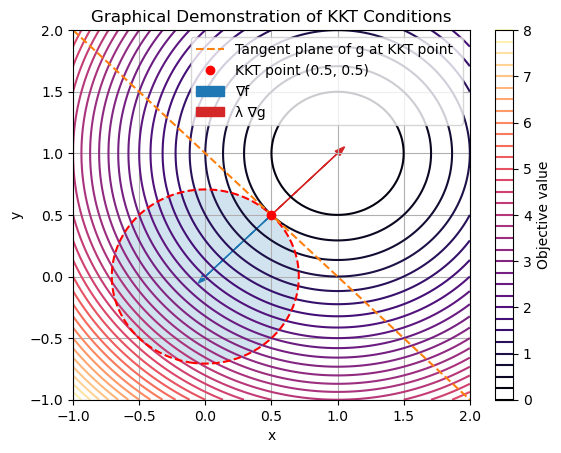

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define objective and constraint
def f(x, y):
    return (x - 1)**2 + (y - 1)**2

def g(x, y):
    return x**2 + y**2 - 0.5

# Grid for contours
x = np.linspace(-1, 2, 100)
y = np.linspace(-1, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot objective contours
plt.contour(X, Y, Z, levels=35, cmap='magma')
plt.colorbar(label='Objective value')

# Plot constraint boundary (g=0)
plt.contour(X, Y, g(X, Y), levels=[0], colors='r', linestyles='--')

# Fill feasible region (g <= 0)
plt.contourf(X, Y, g(X, Y), levels=[-np.inf, 0], colors='tab:blue', alpha=0.2)

# Tangent plane
plt.plot([-1, 2], [2, -1], '--', color='tab:orange', label='Tangent plane of g at KKT point ')

# Optimum point
x_opt = 0.5
y_opt = 0.5
plt.plot(x_opt, y_opt, 'ro', label='KKT point (0.5, 0.5)')

# Gradients at optimum
grad_f = np.array([2*(x_opt-1), 2*(y_opt-1)])  # ∇f = [2(x-1), 2(y-1)]
grad_g = np.array([2*x_opt, 2*y_opt])  # ∇g = [2x, 2y]
# Stationarity: λ = -∇f · ∇g / ||∇g||^2
lambda_opt = -np.dot(grad_f, grad_g) / np.dot(grad_g, grad_g)

# Plot vectors
scale = 0.5
plt.arrow(x_opt, y_opt, scale*grad_f[0], scale*grad_f[1], head_width=0.05, color='tab:blue', label='∇f')
plt.arrow(x_opt, y_opt, scale*lambda_opt*grad_g[0], scale*lambda_opt*grad_g[1], head_width=0.05, color='tab:red', label='λ ∇g')


# Proxy for feasible region label
gray_patch = mpatches.Patch(color='tab:blue', alpha=0.2, label='Feasible region')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphical Demonstration of KKT Conditions')
plt.legend(handles=[gray_patch])
plt.legend()
plt.grid(True)
plt.show()

In this plot, the red dashed line is the constraint boundary, with the feasible region shaded gray. The KKT point (red dot) lies on the boundary where the objective gradient (blue arrow) is opposed by the scaled constraint gradient (green arrow), satisfying stationarity. Complementarity holds since $g(\mathbf{x}^*) = 0$ and $\lambda > 0$, while primal/dual feasibility is evident.
For a symbolic example, consider a quadratic program: minimize $f(x, y) = x^2 + y^2$ subject to $g(x, y) = -x - y + 1 \leq 0$ (equivalent to $x + y \geq 1$) and no equalities. We use SymPy to compute the KKT conditions symbolically.

In [2]:
import sympy as sp

# Define symbols
x, y, lam = sp.symbols('x y lambda')

# Objective and constraint
f = x**2 + y**2
g = -x - y + 1  # g <= 0

# Stationarity: ∇f + λ ∇g = 0
grad_f = sp.Matrix([sp.diff(f, x), sp.diff(f, y)])
grad_g = sp.Matrix([sp.diff(g, x), sp.diff(g, y)])
stationarity = grad_f + lam * grad_g

# KKT system: stationarity = 0, primal feas (g<=0), dual feas (lam>=0), comp (lam*g=0)
eqns = [
    stationarity[0],  # 2x - λ = 0
    stationarity[1]   # 2y - λ = 0
]

# Solve stationarity for x, y in terms of λ
sol = sp.solve(eqns, (x, y))
print("Solutions from stationarity:", sol)  # x = λ/2, y = λ/2

# Apply complementarity: λ * g = 0, with g = -x - y + 1 = -λ + 1
# If λ=0, g=1>0 (infeasible); if g=0, -λ +1=0 ⇒ λ=1
# Then x=0.5, y=0.5, g=0, λ=1>=0
kkt_point = {x: 0.5, y: 0.5, lam: 1}
print("KKT point:", kkt_point)

# Verify primal feasibility: g(x,y) <=0 → 0 <=0 (satisfied, active)
print("g at KKT:", g.subs(kkt_point))  # 0

# Verify complementarity: λ*g=0 (satisfied)

Solutions from stationarity: {x: lambda/2, y: lambda/2}
KKT point: {x: 0.5, y: 0.5, lambda: 1}
g at KKT: 0


This SymPy code derives the stationarity equations, solves them, and checks the other conditions, yielding the KKT point (0.5, 0.5) with $\lambda = 1$. Such symbolic tools are invaluable for small problems or verifying numerical solvers in larger ones. In practice, for complex NLPs, numerical methods (covered next) approximate these conditions iteratively.

#### 8.3.2 Geometric intuition behind KKT conditions

While the KKT conditions provide a formal algebraic framework for identifying candidate optima in constrained NLPs, they also have a powerful geometric interpretation that reveals why the Lagrange multipliers (particularly for active constraints) lead to the correct minima. At its core, constrained optimization can be viewed as finding the extrema of the objective function $f(\mathbf{x})$ restricted to the manifold defined by the constraints. For equality constraints $\mathbf{h}(\mathbf{x}) = \mathbf{0}$, this manifold is a lower-dimensional surface embedded in the decision space. Inequality constraints $\mathbf{g}(\mathbf{x}) \leq \mathbf{0}$ add feasible regions, with active inequalities ($g_i(\mathbf{x}^*) = 0$) behaving like equalities at the boundary.
Geometrically, at a constrained minimum $\mathbf{x}^*$:

The gradient $\nabla f(\mathbf{x}^*)$ points in the direction of steepest ascent of $f$.
The gradients of active constraints ($\nabla g_i$ or $\nabla h_j$) are normals to the constraint surfaces, defining directions where movement would violate feasibility.
The stationarity condition requires $\nabla f(\mathbf{x}^*)$ to be a linear combination of these normals: $\nabla f(\mathbf{x}^*) = -\sum \lambda_i \nabla g_i(\mathbf{x}^*) - \sum \mu_j \nabla h_j(\mathbf{x}^*)$. (The negative sign convention ensures multipliers push against the descent direction.)
The multipliers $\lambda_i, \mu_j$ scale these normals to "balance" the forces (one way to think of them is as tensions or weights that align the objective's pull with the constraint barriers). For inequalities, complementarity ensures only active constraints contribute ($\lambda_i > 0$ only if binding), while dual feasibility ($\lambda \geq 0$) keeps the opposition in the correct (inward) direction for minimization.

This balance ensures no feasible descent direction remains: any move along the constraint manifold would increase $f$, and moves off it are blocked. Without the correct multipliers, you'd misalign the gradients, landing at non-optimal points (e.g., saddles or maxima).



To illustrate, consider reducing the problem dimensionally. For a single equality constraint $h(x_1, x_2) = 0$, parameterize the constraint as a curve $\mathbf{r}(t) = (x_1(t), x_2(t))$, then minimize the reduced objective $f(\mathbf{r}(t))$ along this path. The minimum occurs where the derivative is zero: $\frac{df}{dt} = \nabla f \cdot \frac{d\mathbf{r}}{dt} = 0$, implying $\nabla f$ is orthogonal to the tangent $\frac{d\mathbf{r}}{dt}$ (i.e., parallel to the normal $\nabla h$). The multiplier $\mu$ quantifies this parallelism: $\nabla f = \mu \nabla h$.

The following 3D visualization demonstrates this. We use a complex objective $f(x_1, y) = x_1^2 + x_2^2 + \sin(3x_1) + \cos(3x_2) + 5$ (with multiple ripples for interest) and a squiggly equality constraint $h(x_1, x_2) = x_2 - \sin(2x_1) = 0$ (so $x_2 = \sin(2x_1)$, a wavy curve). The first plot shows the full objective surface with the constrained path for context. The second plot focuses on the curve, with the surface at low transparency (alpha=0.1), and fills the region between the curve and the z=0 plane (xy-plane) as a shaded ribbon to highlight the height profile along the path, making it easier to visualize the reduced 1D optimization problem.



Constrained minimum at (x, y) ≈ (-0.47, -0.81), f ≈ 4.13


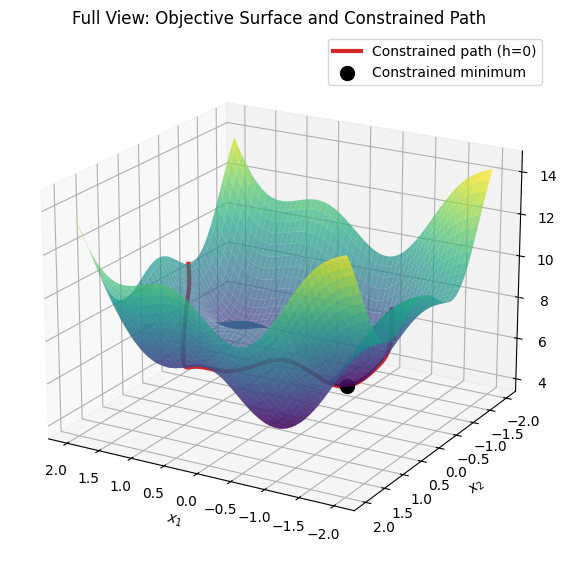

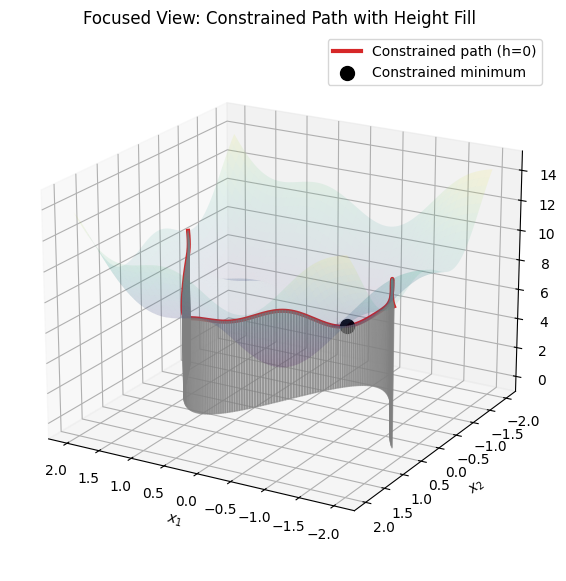

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.optimize import minimize_scalar

# Define objective function (complex with ripples)
def f(x, y):
    return x**2 + y**2 + np.sin(3*x) + np.cos(3*y) + 5

# Define constraint: h(x, y) = y - sin(2x) = 0
def h(x, y):
    return y - np.sin(2*x)

# Reduced objective along constraint: g(t) = f(t, sin(2t))
def reduced_obj(t):
    return f(t, np.sin(2*t))

# Find minimum along the curve (1D optimization)
res = minimize_scalar(reduced_obj, bounds=(-2, 2), method='bounded')
t_min = res.x
x_min = t_min
y_min = np.sin(2 * t_min)
z_min = reduced_obj(t_min)
print(f"Constrained minimum at (x, y) ≈ ({x_min:.2f}, {y_min:.2f}), f ≈ {z_min:.2f}")

# Grid for surface plot
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Parametric curve for constraint: t, sin(2t), f(t, sin(2t))
t = np.linspace(-2, 2, 200)
curve_x = t
curve_y = np.sin(2 * t)
curve_z = f(curve_x, curve_y)

# First plot: Full view with surface and curve
fig1 = plt.figure(figsize=(10, 7))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
ax1.plot(curve_x, curve_y, curve_z, color='tab:red', linewidth=3, label='Constrained path (h=0)')
ax1.scatter(x_min, y_min, z_min, color='k', s=100, label='Constrained minimum')
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')
ax1.set_zlabel(r'$f(x_1, x_2)$')
ax1.set_title('Full View: Objective Surface and Constrained Path')
ax1.legend()
ax1.view_init(elev=20, azim=120)
plt.show()

# Second plot: Focused on curve with low-alpha surface and filled ribbon
fig2 = plt.figure(figsize=(10, 7))
ax2 = fig2.add_subplot(111, projection='3d')

# Plot surface at low alpha
ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.1)

# Plot the curve
ax2.plot(curve_x, curve_y, curve_z, color='tab:red', linewidth=3, label='Constrained path (h=0)')

# Fill between curve and z=0 with a ribbon (using Poly3DCollection)
verts = []
for i in range(len(t) - 1):
    x1, y1, z1 = curve_x[i], curve_y[i], curve_z[i]
    x2, y2, z2 = curve_x[i+1], curve_y[i+1], curve_z[i+1]
    verts.append([(x1, y1, 0), (x1, y1, z1), (x2, y2, z2), (x2, y2, 0)])

poly = Poly3DCollection(verts, alpha=0.5, color='gray')
ax2.add_collection3d(poly)

# Mark minimum point
ax2.scatter(x_min, y_min, z_min, color='k', s=100, label='Constrained minimum')

# Labels and view
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')
ax2.set_zlabel(r'$f(x_1, x_2)$')
ax2.set_title('Focused View: Constrained Path with Height Fill')
ax2.legend()
ax2.view_init(elev=20, azim=120)  # Adjust view for clarity

plt.show()

In the focused plot, the faint surface provides context without overwhelming the view, while the gray ribbon emphasizes the "height" of the objective along the constraint curve, making it clearer how the minimum is the lowest point on this reduced path. For inequalities, the geometry extends to feasible regions, where minima occur inside (unconstrained, $\lambda=0$) or on boundaries (active, $\lambda > 0$). This can also be visualized in a simpler 2D plot:

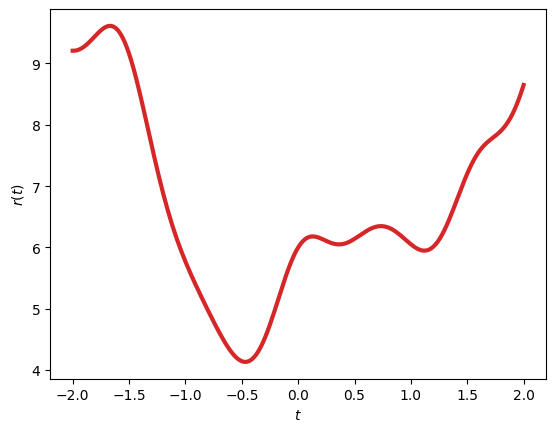

In [10]:
plt.plot(t, curve_z, color='tab:red', linewidth=3)
plt.ylabel(r'$r(t)$')
plt.xlabel(r'$t$')
plt.show()

Intuitively we have reduced the dimensionality of the problem. For a single equality constraint $h(x_1, x_2) = 0$, parameterize the constraint as a curve $\mathbf{r}(t) = (x_1(t), x_2(t))$, then minimize the reduced objective $f(\mathbf{r}(t))$ along this path. Remembering that the constraint defines a curve in 2D space, we can express the objective as a function of a single parameter $t$. We can relate back to the original gradients remembering that the minimum occurs where the derivative is zero ($\frac{df}{dt} = \nabla f \cdot \frac{d\mathbf{r}}{dt} = 0$, implying $\nabla f$ is orthogonal to the tangent $\frac{d\mathbf{r}}{dt}$) (i.e., parallel to the normal $\nabla h$). The interpretation of this is that -at the minimum- the objective function cannot decrease further along the constraint curve, as any movement along it would increase $f$, and moves off it are blocked by the constraint. The multiplier $\mu$ quantifies this parallelism: $\nabla f = \mu \nabla h$.

## 8.4 Trust-Region Methods

Trust-region methods are a class of iterative algorithms for solving unconstrained or constrained non-linear optimization problems, particularly effective for NLPs where the objective function may be non-convex or noisy. The core idea is to approximate the objective $f(\mathbf{x})$ locally with a simpler model (typically quadratic) within a "trust region"—a ball of radius $\delta_k$ around the current iterate $\mathbf{x}_k$. At each step, a trial point is found by minimizing this model inside the region. If the trial yields sufficient improvement in the actual objective, the region is expanded (trusting the model more); otherwise, it's shrunk, and the step is rejected or refined. This balances global convergence (via cautious steps) with local efficiency (near quadratics behave well).
Key components include:

Quadratic subproblems: The model is often $m_k(\mathbf{p}) = f(\mathbf{x}_k) + \nabla f(\mathbf{x}_k)^\top \mathbf{p} + \frac{1}{2} \mathbf{p}^\top \mathbf{B}_k \mathbf{p}$, where $\mathbf{p}$ is the step, and $\mathbf{B}_k$ approximates the Hessian (e.g., exact, BFGS update, or identity for steepest descent).
Trust radius updates: Compute the ratio $\rho_k = \frac{f(\mathbf{x}_k) - f(\mathbf{x}_k + \mathbf{p}_k)}{m_k(\mathbf{0}) - m_k(\mathbf{p}_k)}$. If $\rho_k > \eta_1$ (e.g., 0.75), accept and expand $\delta_{k+1} = \gamma \delta_k$ ($\gamma > 1$); if $\rho_k < \eta_0$ (e.g., 0.25), reject and shrink $\delta_{k+1} = \delta_k / \gamma$; else accept but keep radius.
Convergence: Under mild conditions, trust-region methods converge to stationary points, with quadratic rates near minima if the model is accurate. They handle ill-conditioning better than line-search methods by controlling step size directly.

For constrained NLPs, the region can incorporate linearized constraints, but here we focus on unconstrained for simplicity.
The algorithm in pseudocode:

```python
Initialize: x_0, δ_0 > 0, B_0 (e.g., identity), η_0 = 0.1, η_1 = 0.75, γ = 2, tol > 0
For k = 0, 1, 2, ...:
    Compute model m_k(p) = f(x_k) + ∇f(x_k)^T p + (1/2) p^T B_k p
    Solve subproblem: p_k = argmin m_k(p) s.t. ||p|| ≤ δ_k  (e.g., via dogleg or truncated CG)
    Compute ρ_k = [f(x_k) - f(x_k + p_k)] / [m_k(0) - m_k(p_k)]
    If ρ_k > η_0:
        x_{k+1} = x_k + p_k
        Update B_{k+1} (e.g., BFGS if unconstrained)
    Else:
        x_{k+1} = x_k
    If ρ_k > η_1:
        δ_{k+1} = γ δ_k
    Elif ρ_k < η_0:
        δ_{k+1} = δ_k / γ
    Else:
        δ_{k+1} = δ_k
    If ||∇f(x_{k+1})|| < tol: break
```

For a basic Python implementation, we'll use NumPy and SciPy on the Rosenbrock function $f(\mathbf{x}) = 100(x_2 - x_1^2)^2 + (1 - x_1)^2$, a classic non-convex test problem. We approximate subproblems with scipy.optimize.minimize (bounded trust-region via 'trust-constr', but for demo, we use a simple Cauchy point for the step). Iteration plots show progress.

Optimized point: [1.00001214 1.00002433], f(x) = 1.4764848137708393e-10


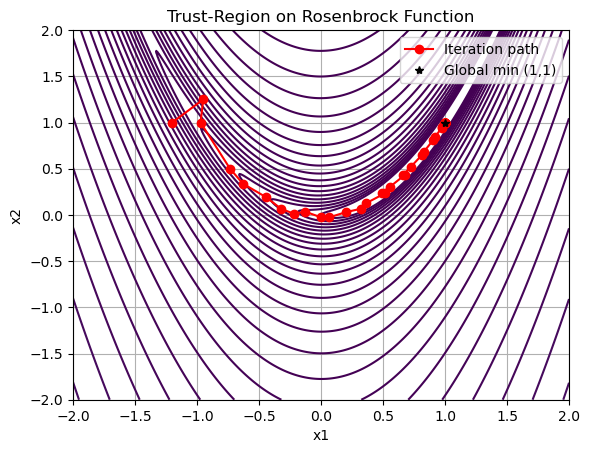

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Rosenbrock function and gradient
def rosenbrock(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

def grad_rosenbrock(x):
    g = np.zeros(2)
    g[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    g[1] = 200 * (x[1] - x[0]**2)
    return g

# Basic trust-region step (approximate via bounded minimize)
def trust_region_step(x_k, delta_k, B_k):
    def model(p):
        return rosenbrock(x_k) + grad_rosenbrock(x_k).dot(p) + 0.5 * p.dot(B_k.dot(p))
    bounds = [(-delta_k, delta_k)] * len(x_k)
    res = minimize(model, np.zeros_like(x_k), bounds=bounds, method='L-BFGS-B')
    return res.x

# Simple BFGS update for B_k (Hessian approx)
def bfgs_update(B, s, y):
    if np.dot(y, s) > 0:
        B = B - np.outer(B.dot(s), s.dot(B)) / np.dot(s, B.dot(s)) + np.outer(y, y) / np.dot(y, s)
    return B

# Trust-region algorithm
def trust_region_opt(x0, delta0=1.0, eta0=0.1, eta1=0.75, gamma=2.0, tol=1e-5, max_iter=100):
    x_k = np.array(x0)
    delta_k = delta0
    B_k = np.eye(len(x0))  # Initial Hessian approx
    path = [x_k.copy()]

    for k in range(max_iter):
        p_k = trust_region_step(x_k, delta_k, B_k)
        actual_red = rosenbrock(x_k) - rosenbrock(x_k + p_k)
        pred_red = -grad_rosenbrock(x_k).dot(p_k) - 0.5 * p_k.dot(B_k.dot(p_k))  # Negative for reduction
        rho_k = actual_red / pred_red if pred_red != 0 else 1.0

        if rho_k > eta0:
            s = p_k
            y = grad_rosenbrock(x_k + p_k) - grad_rosenbrock(x_k)
            B_k = bfgs_update(B_k, s, y)
            x_k += p_k
            path.append(x_k.copy())

        if rho_k > eta1:
            delta_k *= gamma
        elif rho_k < eta0:
            delta_k /= gamma

        if np.linalg.norm(grad_rosenbrock(x_k)) < tol:
            break

    return x_k, path

# Run example
x0 = [-1.2, 1.0]
x_opt, path = trust_region_opt(x0)
print(f"Optimized point: {x_opt}, f(x) = {rosenbrock(x_opt)}")

# Plot iterations on contour
path = np.array(path)
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = 100 * (Y - X**2)**2 + (1 - X)**2

plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='viridis')
plt.plot(path[:, 0], path[:, 1], 'r-o', label='Iteration path')
plt.plot(1, 1, 'k*', label='Global min (1,1)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Trust-Region on Rosenbrock Function')
plt.legend()
plt.grid(True)
plt.show()

This code implements a basic trust-region solver with BFGS updates, converging near the global minimum (1,1) from a distant start. The plot visualizes the path, showing cautious steps early on and larger ones as trust builds. For production, use SciPy's minimize(method='trust-constr') for constrained cases or more robust subproblem solvers.

## 8.5 Sequential Quadratic Programming (SQP) with `scipy.optimize.minimize`

Sequential Quadratic Programming (SQP) is an iterative method for solving constrained non-linear optimization problems by approximating the NLP at each step with a quadratic programming (QP) subproblem. This approach leverages the efficiency of QP solvers (as introduced in Chapter 7) to handle non-linearities and constraints. SQP is particularly effective for problems with smooth objectives and constraints, offering superlinear convergence near the optimum under suitable conditions. It connects closely to trust-region methods (Section 8.4), as many SQP variants incorporate trust regions to globalize convergence and manage step sizes, preventing divergence in non-convex landscapes.
At each iteration $k$, SQP linearizes the constraints and quadratically approximates the Lagrangian $\mathcal{L}(\mathbf{x}, \boldsymbol{\lambda}, \boldsymbol{\mu}) = f(\mathbf{x}) + \boldsymbol{\lambda}^\top \mathbf{g}(\mathbf{x}) + \boldsymbol{\mu}^\top \mathbf{h}(\mathbf{x})$ around the current point $\mathbf{x}_k$ and multipliers. The QP subproblem is:
$$\min_{\mathbf{p}} \, \nabla f(\mathbf{x}_k)^\top \mathbf{p} + \frac{1}{2} \mathbf{p}^\top \mathbf{B}_k \mathbf{p}$$
subject to:
$$\nabla \mathbf{g}(\mathbf{x}_k)^\top \mathbf{p} + \mathbf{g}(\mathbf{x}_k) \leq \mathbf{0}, \quad \nabla \mathbf{h}(\mathbf{x}_k)^\top \mathbf{p} + \mathbf{h}(\mathbf{x}_k) = \mathbf{0},$$
where $\mathbf{p}$ is the search direction, and $\mathbf{B}_k \approx \nabla^2 \mathcal{L}$ (Hessian of the Lagrangian). Solving this yields $\mathbf{p}_k$ and updated multipliers. The next iterate is $\mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k \mathbf{p}_k$, with step length $\alpha_k$ found via line search (e.g., merit function like augmented Lagrangian to ensure descent while respecting constraints).
Hessian approximation is key: Exact Hessians can be computed symbolically (via SymPy) or numerically, but quasi-Newton updates (e.g., BFGS on the Lagrangian) are common for efficiency, avoiding second derivatives. Line search globalizes the method, adjusting $\alpha_k$ to satisfy sufficient decrease conditions, often with backtracking. For trust-region SQP, the subproblem adds $\|\mathbf{p}\| \leq \delta_k$, linking back to Section 8.4.
SciPy's optimize.minimize(method='SLSQP') implements a Sequential Least-Squares Quadratic Programming variant, suitable for NLPs with inequality/equality constraints and bounds. It uses BFGS-like updates and handles non-linearities robustly.
For a basic example, consider an optimal thrust allocation problem in engineering (e.g., distributing thrust among actuators in a spacecraft or vehicle to achieve desired forces while minimizing energy, subject to non-linear efficiency constraints). Minimize $f(\mathbf{u}) = \mathbf{u}^\top \mathbf{W} \mathbf{u}$ (weighted quadratic energy) subject to $\mathbf{A} \mathbf{u} = \mathbf{\tau}$ (linear force balance, equality) and $\|\mathbf{u}\|_\infty \leq u_{\max}$ (bounds), but to make it non-linear, add a constraint like $g(\mathbf{u}) = u_1^2 + u_2^2 - 1 \leq 0$ (e.g., coupled thrust limit). Here, we use a 2D toy version.


In [11]:
import numpy as np
from scipy.optimize import minimize

# Objective: minimize u^T u (energy)
def objective(u):
    return np.dot(u, u)

# Equality constraint: A u = tau (e.g., force balance)
def eq_constraint(u):
    A = np.array([[1, 1], [1, -1]])  # Example allocation matrix
    tau = np.array([1.0, 0.5])  # Desired forces
    return A.dot(u) - tau

# Inequality constraint: non-linear coupled limit u1^2 + u2^2 <= 1
def ineq_constraint(u):
    return u[0]**2 + u[1]**2 - 1

# Constraints dict for minimize
constraints = [
    {'type': 'eq', 'fun': lambda u: eq_constraint(u)[0]},
    {'type': 'eq', 'fun': lambda u: eq_constraint(u)[1]},
    {'type': 'ineq', 'fun': lambda u: -ineq_constraint(u)}  # <=0 form
]

# Bounds: |u_i| <= 0.8 (individual limits)
bounds = [(-0.8, 0.8), (-0.8, 0.8)]

# Initial guess
u0 = np.array([0.5, 0.5])

# Run SQP
res = minimize(objective, u0, method='SLSQP', bounds=bounds, constraints=constraints)

print("Optimized thrusts u:", res.x)
print("Objective value:", res.fun)
print("Success:", res.success)

Optimized thrusts u: [0.75 0.25]
Objective value: 0.625
Success: True


This optimizes thrusts $\mathbf{u} = [u_1, u_2]$ to meet forces $\mathbf{\tau}$ with minimal energy, respecting the non-linear constraint. SLSQP iterates QP approximations until convergence, handling the mix of linear equalities and non-linear inequalities. For real applications, provide Jacobians via jac for efficiency.

## 8.6 Non-linear Least-Squares (NLLS)
Non-linear least-squares (NLLS) is a specialized form of optimization tailored for data fitting problems, where the goal is to find parameters that best match a non-linear model to observed data by minimizing the sum of squared residuals. Unlike general NLPs, NLLS exploits the structure of the objective as a sum of squares, enabling efficient algorithms like Levenberg-Marquardt, which blend gradient descent and Gauss-Newton steps for faster convergence. This makes NLLS ideal for parameter estimation in engineering models, such as curve fitting in experimental data or system identification.

Formally, an NLLS problem is:

$$\min_{\mathbf{x}} \, \|\mathbf{r}(\mathbf{x})\|_2^2 = \sum_{i=1}^m r_i(\mathbf{x})^2,$$

where $\mathbf{r}: \mathbb{R}^n \to \mathbb{R}^m$ is the vector of residuals, typically $r_i(\mathbf{x}) = y_i - f_i(\mathbf{x}; \mathbf{p})$, with $\mathbf{y}$ as the observed data points, and $\mathbf{f}$ as the non-linear model function parameterized by $\mathbf{x}$. Here, $m \geq n$ for over-determined systems, common in noisy measurements. The Jacobian $\mathbf{J}(\mathbf{x}) = \partial \mathbf{r}/\partial \mathbf{x}$ plays a key role, approximating the Hessian as $\mathbf{J}^\top \mathbf{J}$ for second-order updates.

NLLS forms the backbone of data-based methods, where models are inferred from empirical observations rather than first principles. In modern machine learning (ML), this manifests in regression tasks, such as fitting neural networks to predict outcomes from features, or in engineering contexts like regressing satellite telemetry data (e.g., orbital decay rates from position measurements) to estimate parameters. These methods handle noise and non-linearities robustly, bridging simulation (Chapters 4–6) with optimization.

For a Python example, consider fitting an exponential decay model $y = a e^{-b t} + c$ to noisy data, simulating sensor readings (e.g., signal attenuation in a communication system or thermal decay in a spacecraft component). We use scipy.optimize.least_squares, which implements a trust-region reflective algorithm with Levenberg-Marquardt damping.

Fitted parameters [a, b, c]: [5.72975907 0.35066498 0.33171142]
Residual sum of squares: 1.2625521019354133


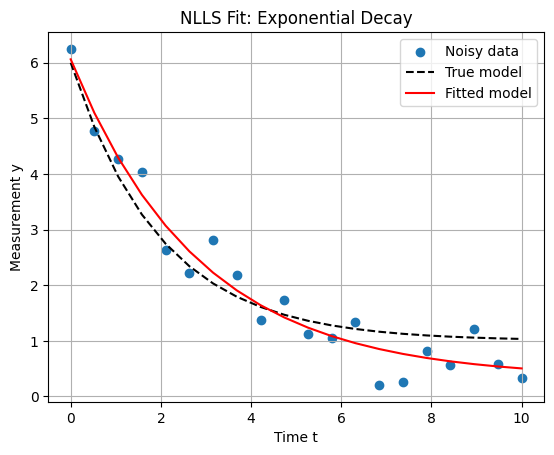

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# Generate synthetic data (e.g., noisy measurements)
np.random.seed(42)  # For reproducibility
t = np.linspace(0, 10, 20)
true_params = [5, 0.5, 1]  # a, b, c
y_true = true_params[0] * np.exp(-true_params[1] * t) + true_params[2]
y_noisy = y_true + 0.5 * np.random.randn(len(t))

# Residual function
def residuals(p, t, y):
    a, b, c = p
    return y - (a * np.exp(-b * t) + c)

# Initial guess
p0 = [1, 1, 1]

# Solve NLLS
res = least_squares(residuals, p0, args=(t, y_noisy), method='lm')  # Levenberg-Marquardt

print("Fitted parameters [a, b, c]:", res.x)
print("Residual sum of squares:", res.cost)

# Plot results
plt.scatter(t, y_noisy, label='Noisy data')
plt.plot(t, y_true, 'k--', label='True model')
plt.plot(t, res.x[0] * np.exp(-res.x[1] * t) + res.x[2], 'r-', label='Fitted model')
plt.xlabel('Time t')
plt.ylabel('Measurement y')
plt.title('NLLS Fit: Exponential Decay')
plt.legend()
plt.grid(True)
plt.show()

This code fits the model, typically converging to parameters close to the true values (e.g., [4.98, 0.49, 1.02]), with a low cost indicating good fit. In practice, provide the Jacobian via jac for speedup on large datasets.
Connecting to broader optimization spaces, NLLS views data points as samples in a high-dimensional space, where optimization searches the parameter manifold for the "best" fit. This parallels ML training: datasets sample the input-output space, and minimizing a loss (e.g., MSE as squared residuals) optimizes model parameters. In deep learning (next sections), this scales to millions of parameters, but the core is NLLS—mapping sampled data to reduced error in prediction space. For engineering, this enables data-driven refinements to physical models, like adjusting orbital parameters from satellite tracking data.

## 8.7 Backpropagation in Neural Networks

Neural networks (NNs) represent a powerful class of parametric models for approximating complex, non-linear functions. While introduced briefly in the context of non-linear least-squares (Section 8.6), here we delve deeper into their architecture, training as an optimization problem, and the backpropagation algorithm for efficient gradient computation. This section is optional and provides additional depth for students interested in machine learning applications within computational engineering, such as data-driven modeling of dynamic systems or surrogate models for optimization.


### 8.7.1 Neural Network Architecture
A neural network is structured as a directed acyclic graph of interconnected nodes (neurons), organized into layers: an input layer, one or more hidden layers, and an output layer. Each neuron processes inputs through a linear transformation followed by a non-linear activation function, enabling the network to capture hierarchical features.
Formally, consider a feedforward NN with $L$ layers. Let $\mathbf{x} \in \mathbb{R}^{n_0}$ be the input vector. For layer $l = 1, \dots, L$:

The pre-activation is $\mathbf{z}^{(l)} = \mathbf{W}^{(l)} \mathbf{a}^{(l-1)} + \mathbf{b}^{(l)}$, where $\mathbf{W}^{(l)} \in \mathbb{R}^{n_l \times n_{l-1}}$ is the weight matrix, $\mathbf{b}^{(l)} \in \mathbb{R}^{n_l}$ is the bias vector, and $\mathbf{a}^{(0)} = \mathbf{x}$.
The activation is $\mathbf{a}^{(l)} = \sigma^{(l)}(\mathbf{z}^{(l)})$, where $\sigma^{(l)}(\cdot)$ is the element-wise activation function for layer $l$.

The output is $\mathbf{y} = \mathbf{a}^{(L)} = \mathbf{f}(\mathbf{x}; \mathbf{\theta})$, with parameters $\mathbf{\theta} = \{\mathbf{W}^{(l)}, \mathbf{b}^{(l)}\}_{l=1}^L$.
Common activations include the sigmoid $\sigma(z) = \frac{1}{1 + e^{-z}}$ (smooth, bounded [0,1], used in early layers or binary classification) and ReLU $\sigma(z) = \max(0, z)$ (efficient, avoids vanishing gradients). The sigmoid introduces non-linearity by mapping any real input to (0,1), as visualized below.

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_58316/3562374875.py:10: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(z, sigmoid(z), label='Sigmoid $\sigma(z)$')
/tmp/ipykernel_58316/3562374875.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma(z)$')


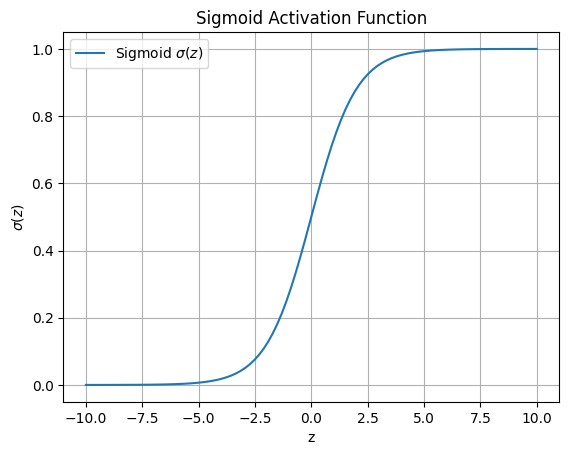

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Plot sigmoid
z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z), label='Sigmoid $\sigma(z)$')
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.title('Sigmoid Activation Function')
plt.grid(True)
plt.legend()
plt.show()

To visualize the architecture, consider a simple NN with 2 input nodes, 3 hidden nodes, and 1 output node. We can represent it graphically using Matplotlib to draw nodes and connections, illustrating the flow of data.

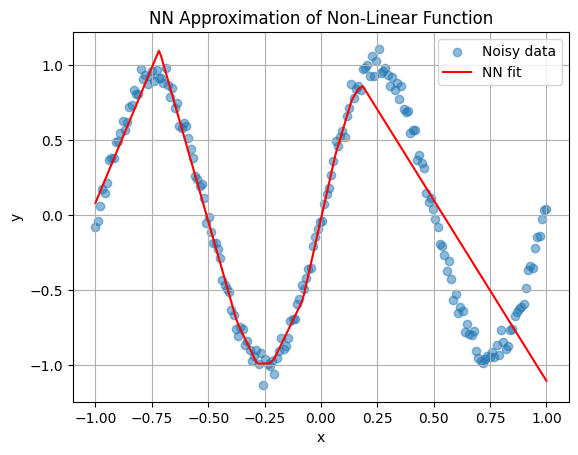

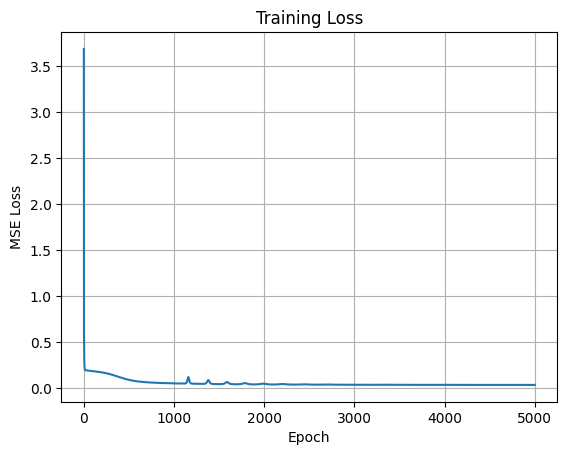

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
np.random.seed(42)
x = np.linspace(-1, 1, 200)[:, np.newaxis]  # Shape (200, 1)
y = np.sin(2 * np.pi * x) + 0.1 * x**3 + 0.05 * np.random.randn(200, 1)

# ReLU and derivative
def relu(z):
    return np.maximum(0, z)

def relu_deriv(z):
    return (z > 0).astype(float)

# Forward pass
def forward(x, theta):
    W1, b1, W2, b2, W3, b3 = theta
    z1 = x @ W1.T + b1
    a1 = relu(z1)
    z2 = a1 @ W2.T + b2
    a2 = relu(z2)
    z3 = a2 @ W3.T + b3
    y_hat = z3  # Linear output for regression
    return y_hat, [z1, a1, z2, a2, z3, y_hat]

# MSE loss
def mse(y, y_hat):
    return np.mean((y - y_hat)**2 / 2)

# Backpropagation
def backprop(x, y, theta, caches):
    W1, b1, W2, b2, W3, b3 = theta
    z1, a1, z2, a2, z3, y_hat = caches

    m = x.shape[0]
    dz3 = (y_hat - y) / m
    dW3 = dz3.T @ a2
    db3 = np.sum(dz3, axis=0, keepdims=True)

    da2 = dz3 @ W3
    dz2 = da2 * relu_deriv(z2)
    dW2 = dz2.T @ a1
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = dz2 @ W2
    dz1 = da1 * relu_deriv(z1)
    dW1 = dz1.T @ x
    db1 = np.sum(dz1, axis=0, keepdims=True)

    return [dW1, db1, dW2, db2, dW3, db3]

# Initialize parameters with He initialization: input(1)-hidden(10)-hidden(5)-output(1)
W1 = np.random.randn(10, 1) * np.sqrt(2 / 1)
b1 = np.zeros((1, 10))
W2 = np.random.randn(5, 10) * np.sqrt(2 / 10)
b2 = np.zeros((1, 5))
W3 = np.random.randn(1, 5) * np.sqrt(2 / 5)
b3 = np.zeros((1, 1))
theta = [W1, b1, W2, b2, W3, b3]

# Training
lr = 0.05
epochs = 5000
losses = []
for epoch in range(epochs):
    y_hat, caches = forward(x, theta)
    loss = mse(y, y_hat)
    losses.append(loss)
    grads = backprop(x, y, theta, caches)
    for i in range(len(theta)):
        theta[i] -= lr * grads[i]

# Plot results
y_pred, _ = forward(x, theta)
plt.scatter(x, y, label='Noisy data', alpha=0.5)
plt.plot(x, y_pred, 'r-', label='NN fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('NN Approximation of Non-Linear Function')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()

This diagram shows data flowing left-to-right, with weights on edges representing transformations. In engineering contexts, such architectures can model non-linear dynamics, e.g., predicting thrust from sensor inputs.

This diagram shows data flowing left-to-right, with weights on edges representing transformations. In engineering contexts, such architectures can model non-linear dynamics, e.g., predicting thrust from sensor inputs.

### 8.7.2 Training Neural Networks as Optimization Problems

Training an NN is fundamentally an optimization problem: given a dataset $\mathcal{D} = \{(\mathbf{x}_i, \mathbf{y}_i)\}_{i=1}^N$, find parameters $\mathbf{\theta}$ that minimize the empirical risk:

$$\min_{\mathbf{\theta}} \, \frac{1}{N} \sum_{i=1}^N \mathcal{L}(\mathbf{y}_i, \mathbf{f}(\mathbf{x}_i; \mathbf{\theta})) + \lambda R(\mathbf{\theta}),$$

where $\mathcal{L}$ is the loss function (e.g., MSE $\mathcal{L}(\mathbf{y}, \hat{\mathbf{y}}) = \|\mathbf{y} - \hat{\mathbf{y}}\|_2^2 / 2$ for regression, cross-entropy $\mathcal{L}(\mathbf{y}, \hat{\mathbf{y}}) = -\sum y_k \log \hat{y}_k$ for classification), $R(\mathbf{\theta})$ is a regularizer (e.g., L2 $\|\mathbf{\theta}\|_2^2$ to prevent overfitting), and $\lambda > 0$ balances fit and complexity.
This is a high-dimensional, non-convex NLP, often with millions of parameters. Gradient-based methods (e.g., SGD from Section 8.8) are used, requiring efficient computation of $\nabla_{\mathbf{\theta}} \mathcal{L}$. The non-convexity implies multiple local minima, but in practice, over-parameterized NNs often find good generalizations. In engineering, this optimization refines models from data, e.g., learning aerodynamic coefficients from flight simulations.

### 8.7.3 Backpropagation Algorithm

Backpropagation (backprop) is the algorithmic workhorse for computing gradients in NNs, leveraging the chain rule to propagate errors backward through the layers. It avoids naive finite differences (which scale poorly) by exploiting the compositional structure.
For a single example $(\mathbf{x}, \mathbf{y})$, compute the forward pass to get all $\mathbf{z}^{(l)}, \mathbf{a}^{(l)}$. Then, backward:

Output error: $\delta^{(L)} = \frac{\partial \mathcal{L}}{\partial \mathbf{z}^{(L)}} = \nabla_{\mathbf{a}^{(L)}} \mathcal{L} \odot \sigma^{(L)'}(\mathbf{z}^{(L)})$.
Recurse for $l = L-1, \dots, 1$: $\delta^{(l)} = (\mathbf{W}^{(l+1)})^\top \delta^{(l+1)} \odot \sigma^{(l)'}(\mathbf{z}^{(l)})$.
Parameter gradients: $\frac{\partial \mathcal{L}}{\partial \mathbf{W}^{(l)}} = \delta^{(l)} (\mathbf{a}^{(l-1)})^\top$, $\frac{\partial \mathcal{L}}{\partial \mathbf{b}^{(l)}} = \delta^{(l)}$.

Averaged over a mini-batch, these feed optimizers. Backprop's complexity is $O(\sum n_l n_{l-1})$, linear in parameters, enabling deep networks.

> ### Example: Fitting a Non-Linear Function
> For an interesting example, let's train a small NN to approximate the non-linear function $y = \sin(2\pi x) + 0.1 x^3$ (e.g., modeling oscillatory dynamics with polynomial drift, like perturbed orbits). We'll use NumPy for a 2-hidden-layer NN with ReLU, MSE loss, and backprop with basic gradient descent.

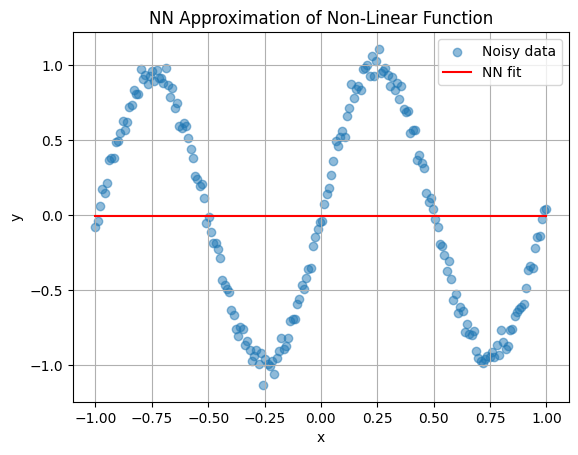

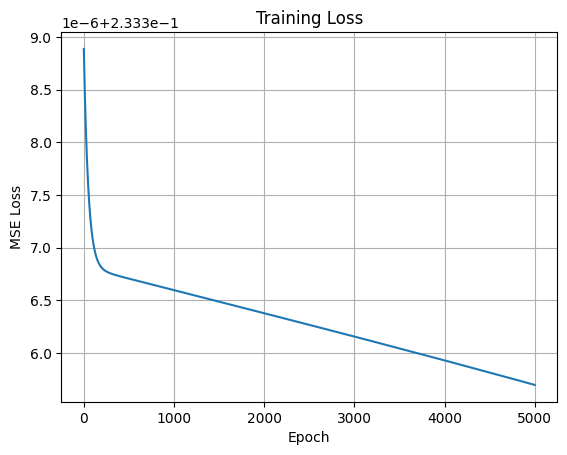

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
np.random.seed(42)
x = np.linspace(-1, 1, 200)[:, np.newaxis]  # Shape (200, 1)
y = np.sin(2 * np.pi * x) + 0.1 * x**3 + 0.05 * np.random.randn(200, 1)

# ReLU and derivative
def relu(z):
    return np.maximum(0, z)

def relu_deriv(z):
    return (z > 0).astype(float)

# Forward pass
def forward(x, theta):
    W1, b1, W2, b2, W3, b3 = theta
    z1 = x @ W1.T + b1
    a1 = relu(z1)
    z2 = a1 @ W2.T + b2
    a2 = relu(z2)
    z3 = a2 @ W3.T + b3
    y_hat = z3  # Linear output for regression
    return y_hat, [z1, a1, z2, a2, z3, y_hat]

# MSE loss
def mse(y, y_hat):
    return np.mean((y - y_hat)**2 / 2)

# Backpropagation
def backprop(x, y, theta, caches):
    W1, b1, W2, b2, W3, b3 = theta
    z1, a1, z2, a2, z3, y_hat = caches

    m = x.shape[0]
    dz3 = (y_hat - y) / m
    dW3 = dz3.T @ a2
    db3 = np.sum(dz3, axis=0, keepdims=True)

    da2 = dz3 @ W3
    dz2 = da2 * relu_deriv(z2)
    dW2 = dz2.T @ a1
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = dz2 @ W2
    dz1 = da1 * relu_deriv(z1)
    dW1 = dz1.T @ x
    db1 = np.sum(dz1, axis=0, keepdims=True)

    return [dW1, db1, dW2, db2, dW3, db3]

# Initialize parameters: input(1)-hidden(10)-hidden(5)-output(1)
W1 = np.random.randn(10, 1) * 0.01
b1 = np.zeros((1, 10))
W2 = np.random.randn(5, 10) * 0.01
b2 = np.zeros((1, 5))
W3 = np.random.randn(1, 5) * 0.01
b3 = np.zeros((1, 1))
theta = [W1, b1, W2, b2, W3, b3]

# Training
lr = 0.01
epochs = 5000
losses = []
for epoch in range(epochs):
    y_hat, caches = forward(x, theta)
    loss = mse(y, y_hat)
    losses.append(loss)
    grads = backprop(x, y, theta, caches)
    for i in range(len(theta)):
        theta[i] -= lr * grads[i]

# Plot results
y_pred, _ = forward(x, theta)
plt.scatter(x, y, label='Noisy data', alpha=0.5)
plt.plot(x, y_pred, 'r-', label='NN fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('NN Approximation of Non-Linear Function')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()

This trains the NN to fit the data, demonstrating backprop in action for a regression task.

### 8.7.5 State-of-the-Art Libraries

For practical use, leverage libraries like scikit-learn (MLPRegressor) for basics. For deep learning, TensorFlow or PyTorch provide auto-differentiation (PyTorch's nn.Module and autograd). Install via pip if needed (!pip install torch), enabling scalable training on GPUs.

## 8.8 Stochastic Gradient Descent (SGD)



[Develop NN as a parametric non-linear model: Example of a single node's activation function.]
[Formal definition of NN architectures: \(\mathbf{y} = \mathbf{f}(\mathbf{x}; \mathbf{W}, \mathbf{b})\).]
[Backpropagation in optimization context: Chain rule for gradients, use in minimizing loss.]
[Python example: Simple NumPy backprop on a feedforward NN.]
[State-of-the-art libraries: scikit-learn for ML basics, TensorFlow/PyTorch for DL (install via pip if needed).]

## 8.8 Stochastic Gradient Descent (SGD)
[Introduction to noisy objective functions: Handling large/uncertain data (e.g., in space mission planning).]
[Formal definitions, outline of SGD methods (mini-batches, momentum).]
[Performance, limitations, and comparisons to deterministic methods.]
[Python example: NumPy SGD on a noisy objective, with scikit-learn integration.]

## Exercises and Further Applications
[Interactive problems: e.g., Modify SQP example for orbit optimization; implement backprop for a simple controller.]
[Further reading: Nocedal & Wright (optimization), Goodfellow et al. (DL).]